# Store item Demands Predictions

[Manuel Amunategui](https://www.youtube.com/watch?v=AX1wKnBPhvU)

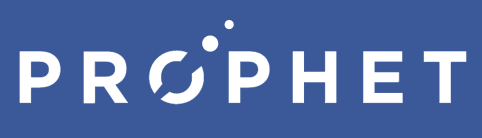

In [14]:
from IPython.display import Image
Image(filename='fbprophet.png')

In [21]:
from datetime import timedelta
from fbprophet import Prophet

import io, base64, os, json, re, glob
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pydata_google_auth
import seaborn as sns
import pandas as pd
import numpy as np
import time

In [16]:
df_raw = pd.read_csv('train.csv', 
                     parse_dates=['date'], 
                     index_col=['date'])
df_raw.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [17]:
df_raw.sort_values('date', ascending=True)
print(df_raw.shape)

(913000, 3)


In [28]:
df_raw.tail()

,store,item,sales
date,,,
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74
2017-12-30,10,50,62
2017-12-31,10,50,82


## Store 1 - ALL Sales 

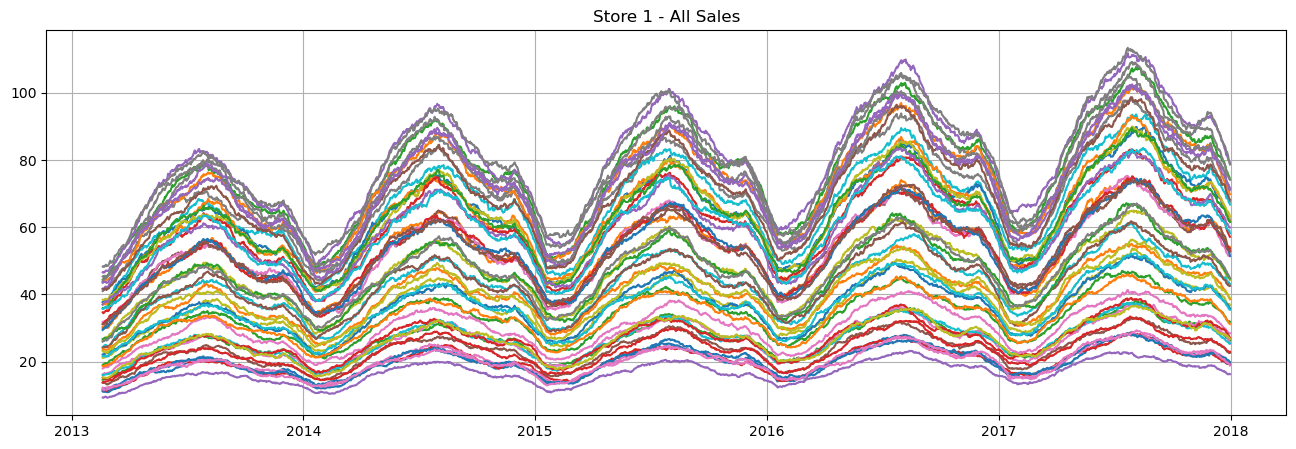

In [24]:
plt.subplots(1, figsize=(16,5))
plt.grid()
plt.title('Store 1 - All Sales')
for item in set(df_raw[df_raw['store'] == 1]['item']):
    plt.plot(df_raw[(df_raw['store'] == 1) &
                    (df_raw['item'] == item)]['sales'].rolling(window=50).mean())
plt.show()

## Item 1 - All Stores

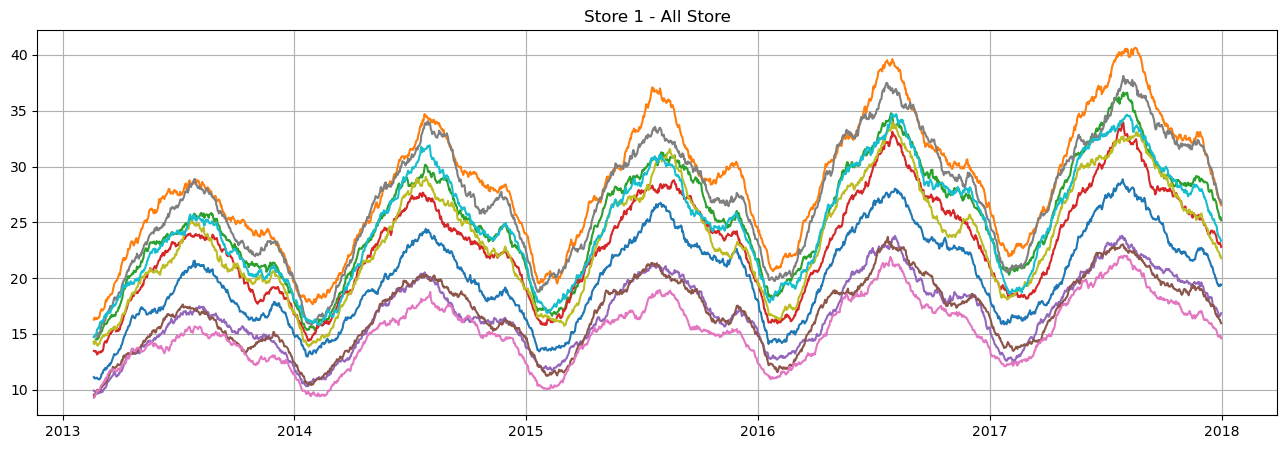

In [25]:
plt.subplots(1, figsize=(16,5))
plt.grid()
plt.title('Store 1 - All Store')
for item in set(df_raw[df_raw['item'] == 1]['store']):
    plt.plot(df_raw[(df_raw['item'] == 1) &
                    (df_raw['store'] == item)]['sales'].rolling(window=50).mean())
plt.show()

## Predict Future Using FBProphet

In [26]:
train_data = df_raw[(df_raw['item'] == 1) & df_raw['store'] == 1]
train_data.reset_index(level=0, inplace=True)
train_data = train_data[['date', 'sales']]
train_data.columns = ['ds', 'y']

train_data = train_data.sample(5000)
prophet_basic = Prophet()
prophet_basic.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = prophet_basic.make_future_dataframe(periods=365)
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
2155,2018-12-27
2156,2018-12-28
2157,2018-12-29
2158,2018-12-30


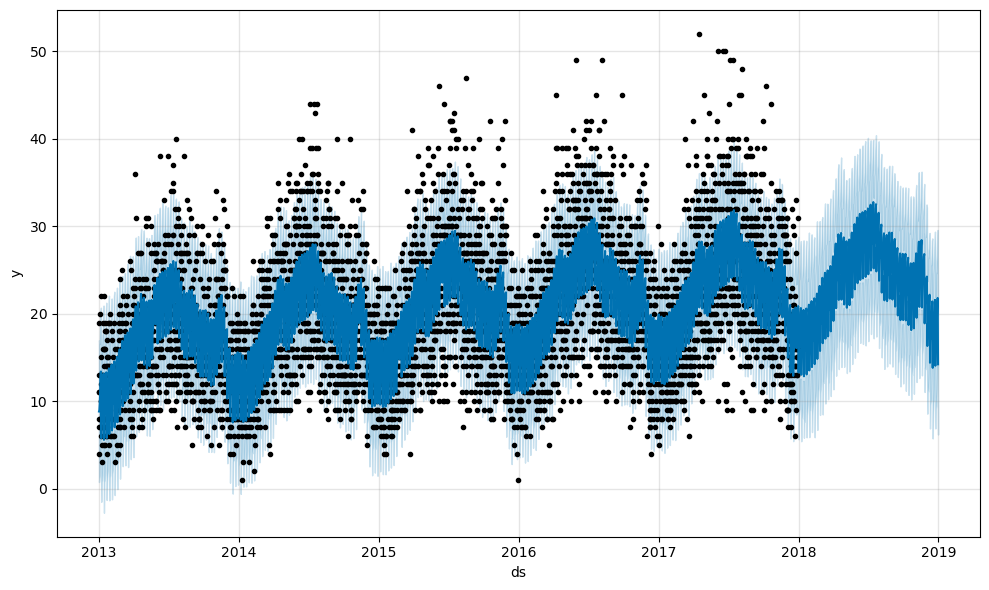

In [33]:
forecast = prophet_basic.predict(future)

fig1 = prophet_basic.plot(forecast)
plt.show()

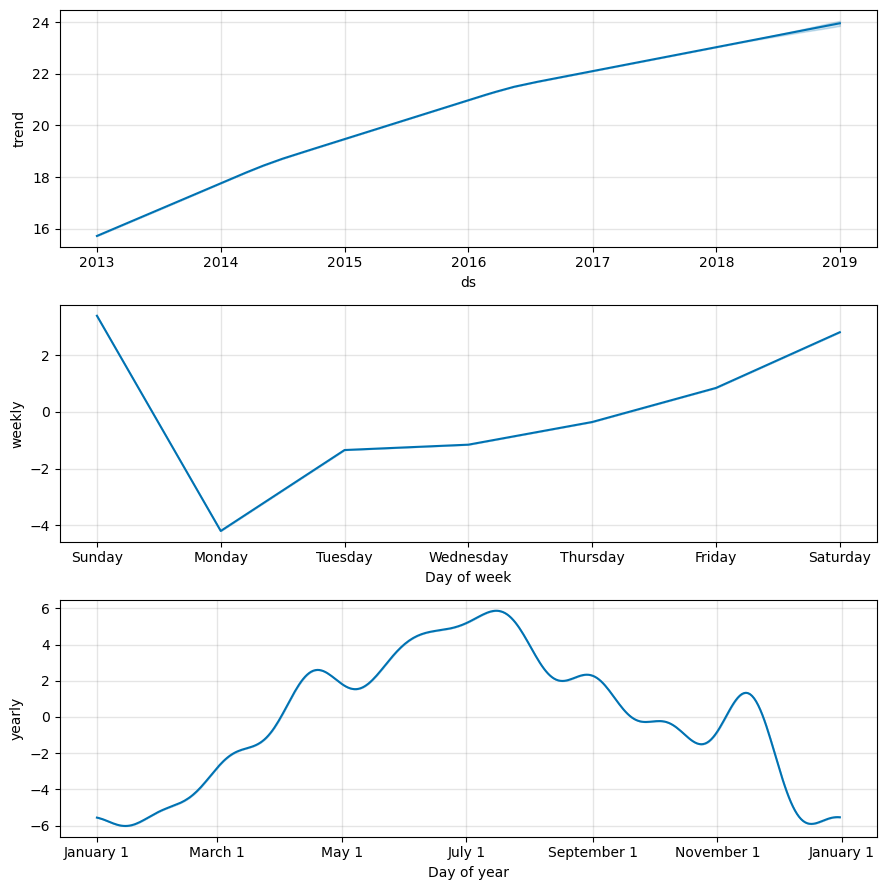

In [34]:
fig1 = prophet_basic.plot_components(forecast)
plt.show()

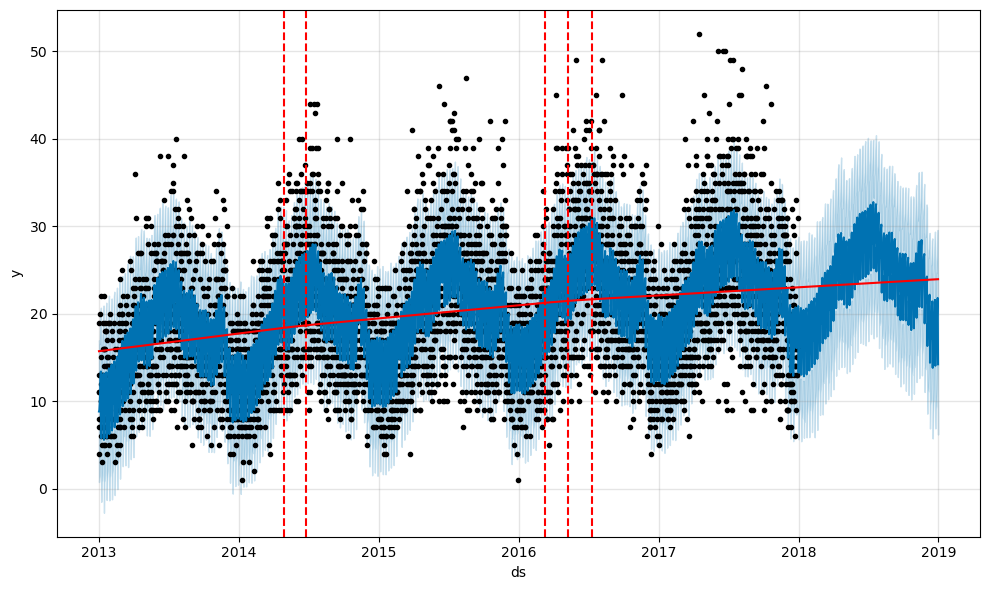

In [35]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)
plt.show()

## Forecast BlackPink - Google Trends

In [59]:
df_blackpink = pd.read_csv('blackpink.csv', header=1)
df_blackpink.head()

,Week,blackpink: (United States)
0,2016-10-09,3
1,2016-10-16,2
2,2016-10-23,4
3,2016-10-30,16
4,2016-11-06,9


In [60]:
df_blackpink.columns = ['ds', 'y']

In [61]:
df_blackpink.head()

,ds,y
0,2016-10-09,3
1,2016-10-16,2
2,2016-10-23,4
3,2016-10-30,16
4,2016-11-06,9


In [62]:
df_blackpink['ds'] = pd.to_datetime(df_blackpink['ds'])
df_blackpink = df_blackpink.sort_values('ds', ascending=True)
print(df_blackpink.shape)
df_blackpink.head()

(260, 2)


,ds,y
0,2016-10-09,3
1,2016-10-16,2
2,2016-10-23,4
3,2016-10-30,16
4,2016-11-06,9


In [63]:
train_dataset = df_blackpink.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future = prophet_basic.make_future_dataframe(periods=365)
future

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2016-10-09
1,2016-10-16
2,2016-10-23
3,2016-10-30
4,2016-11-06
...,...
620,2022-09-22
621,2022-09-23
622,2022-09-24
623,2022-09-25


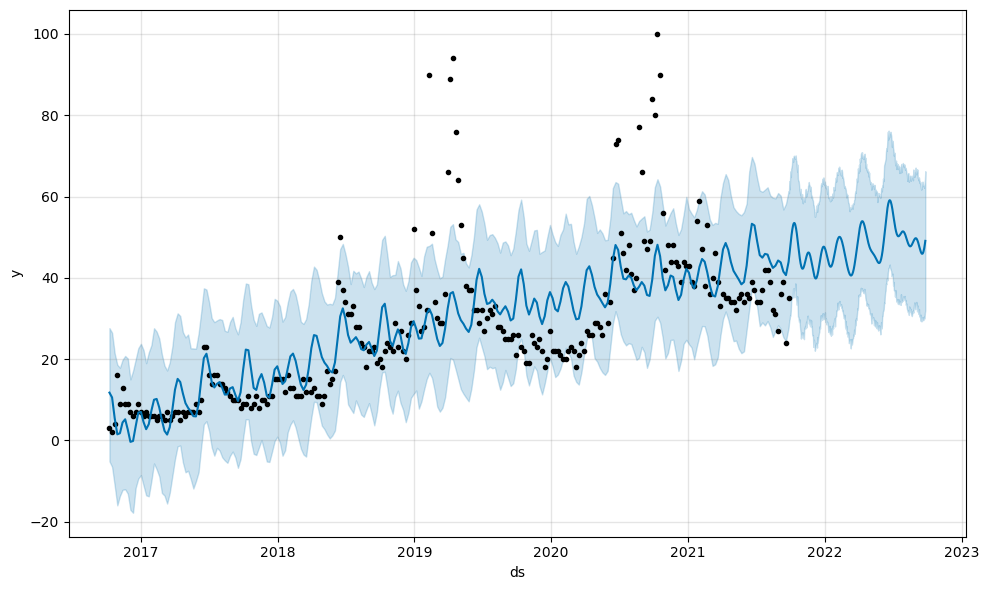

In [64]:
forecast = prophet_basic.predict(future)
fig1 = prophet_basic.plot(forecast)
plt.show()

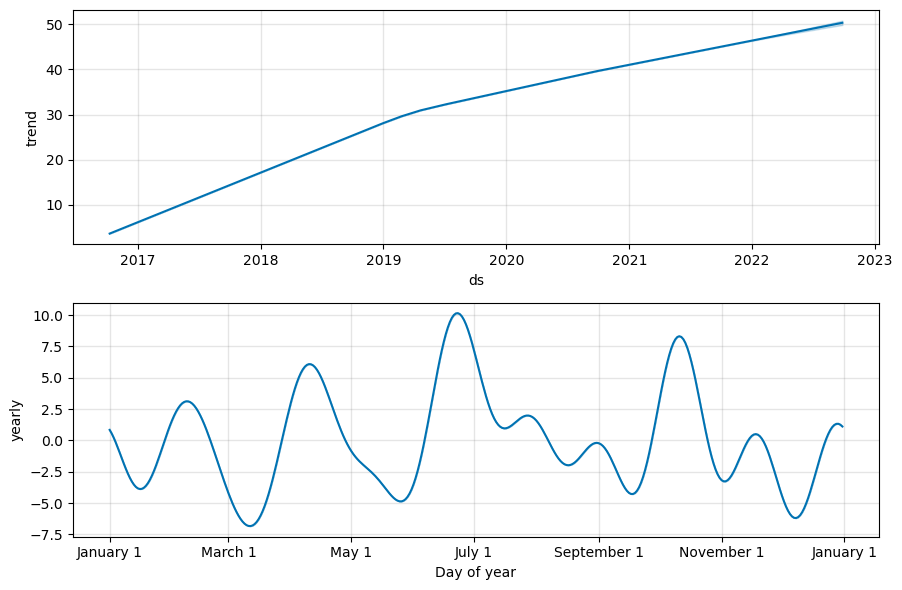

In [65]:
fig1 = prophet_basic.plot_components(forecast)
plt.show()

In [66]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
620,2022-09-22,50.259749,30.443420,62.753621,49.792403,50.729336,-3.479583,-3.479583,-3.479583,-3.479583,-3.479583,-3.479583,0.0,0.0,0.0,46.780165
621,2022-09-23,50.274423,29.926405,62.156467,49.805219,50.745515,-3.042672,-3.042672,-3.042672,-3.042672,-3.042672,-3.042672,0.0,0.0,0.0,47.231751
622,2022-09-24,50.289097,30.245422,63.148309,49.816115,50.761670,-2.516321,-2.516321,-2.516321,-2.516321,-2.516321,-2.516321,0.0,0.0,0.0,47.772775
623,2022-09-25,50.303771,31.395829,64.193465,49.826334,50.777825,-1.907010,-1.907010,-1.907010,-1.907010,-1.907010,-1.907010,0.0,0.0,0.0,48.396761
624,2022-09-26,50.318445,32.055021,66.220363,49.836670,50.794020,-1.223453,-1.223453,-1.223453,-1.223453,-1.223453,-1.223453,0.0,0.0,0.0,49.094992
